# Gensim word vector visualization of various word vectors

In [1]:
import numpy as np
import ipympl
# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from [the Glove page](https://nlp.stanford.edu/projects/glove/). They're inside [this zip file](https://nlp.stanford.edu/data/glove.6B.zip)

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [3]:
glove_file = datapath('/Users/mho/Downloads/python-natural-language-processing/glove.6B/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 300)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
model.most_similar('obama')

[('barack', 0.9254721403121948),
 ('mccain', 0.7590768337249756),
 ('bush', 0.7570987939834595),
 ('clinton', 0.7085603475570679),
 ('hillary', 0.6497915983200073),
 ('kerry', 0.6144052743911743),
 ('rodham', 0.6138635277748108),
 ('biden', 0.5940852165222168),
 ('gore', 0.5885975956916809),
 ('democrats', 0.5608304738998413)]

In [6]:
model.most_similar('banana')

[('bananas', 0.6691170930862427),
 ('mango', 0.580410361289978),
 ('pineapple', 0.5492372512817383),
 ('coconut', 0.5462779402732849),
 ('papaya', 0.541056752204895),
 ('fruit', 0.52181077003479),
 ('growers', 0.4877638518810272),
 ('nut', 0.48399588465690613),
 ('peanut', 0.4806201756000519),
 ('potato', 0.4806118309497833)]

In [7]:
model.most_similar(negative='banana')

[('keyrates', 0.6847262382507324),
 ('rw97', 0.6595869064331055),
 ('+9.00', 0.6340476274490356),
 ('ryryryryryry', 0.6322760581970215),
 ('zety', 0.5784540176391602),
 ('.0342', 0.5776804089546204),
 ('k586-1', 0.5598778128623962),
 ('cw96', 0.5540916323661804),
 ('mongkolporn', 0.5488854050636292),
 ('purva.patel@chron.com', 0.5483731627464294)]

In [103]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.6713


In [104]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [235]:
def raw_analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return(result)

In [156]:
analogy('man','king','woman')

'queen'

In [105]:
analogy('japan', 'japanese', 'australia')

'australian'

In [124]:
analogy('american', 'beer', 'french')

'wine'

In [114]:
analogy('obama', 'clinton', 'reagan')

'ronald'

In [115]:
analogy('tall', 'tallest', 'long')

'longest'

In [116]:
analogy('good', 'fantastic', 'bad')

'horrible'

In [68]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

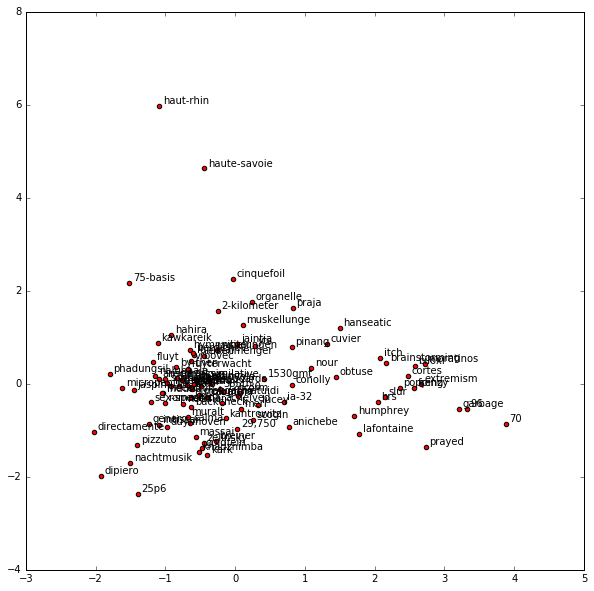

In [69]:
display_pca_scatterplot(model, sample=100)

In [180]:
dentist = model.get_vector('dentist')
teeth = model.get_vector('teeth')

In [210]:
# This is cosine similarity
np.dot(dentist, teeth)/(np.sqrt(np.sum(dentist**2))*np.sqrt(np.sum(teeth**2)))

0.34127992

In [254]:
model.similarity('dentist','teeth')

0.3412799

# Can gensim + GloVe solve SAT analogy questions?
Source: https://www.testprepreview.com/modules/analogies1.htm \
Other algorithms: https://aclweb.org/aclwiki/SAT_Analogy_Questions_(State_of_the_art)

In [76]:
prompts = []
options = []
with open('../analogies.txt') as file:
    lines = file.readlines()
    for i, line in enumerate(lines):
        a,b = [x.strip().lower() for x in line.strip().split(':')]
        if i%6==0:
            prompts.append((a,b))
        else:
            options.append((a,b))

In [94]:
print("Sample question\n", ':'.join(prompts[4]))
print()
for opt in options[5*4:(5*4)+5]:
    print(':'.join(opt))
print("Correct answer is inches:length")

Sample question
 lumen:brightness

candle:light
density:darkness
nickel:metal
inches:length
color:hue
Correct answer is inches:length


In [98]:
answers = ['D', 'B', 'B' ,'D', 'D', 'D', 'E', 'B', 'D', 'C', 'A', 'C', 'D', 'E', 'B', 'D', 'B', 'E', 'A']
order = 'ABCDE'
solutions = [order.index(x) for x in answers]
solutions

[3, 1, 1, 3, 3, 3, 4, 1, 3, 2, 0, 2, 3, 4, 1, 3, 1, 4, 0]

In [253]:
guesses = []
for i, prompt in enumerate(prompts):
    best_answer = None
    current_score = -np.inf
    for n, option in enumerate(options[5*i:(5*i)+5]):
        possible_answer = analogy(prompt[0], prompt[1], option[0])
        # is it better that current best answer?
        score = model.similarity(possible_answer, option[1])
        if score > current_score:
            best_answer = n
            current_score = score
    guesses.append(best_answer)
    print("{} is to {}, as {} is to {}".format(prompt[0],prompt[1],options[5*i:(5*i)+5][best_answer][0],options[5*i:(5*i)+5][best_answer][1]))

drip is to gush, as stream is to tributary
walk is to legs, as dress is to hem
enfranchise is to slavery, as equation is to mathematics
topaz is to yellow, as amethyst is to purple
lumen is to brightness, as inches is to length
maceration is to liquid, as evaporation is to humidity
clumsy is to botch, as clever is to eradicate
fugitive is to flee, as bystander is to procure
chronological is to time, as ordinal is to place
soot is to grimy, as rain is to sodden
morbid is to unfavorable, as reputable is to favorable
sullen is to brood, as lethargic is to cavort
author is to literate, as judge is to impartial
massive is to bulk, as ultimate is to magnitude
entice is to repel, as implore is to entreat
humdrum is to bore, as heartrending is to move
hospitable is to courtesy, as vindictive is to spite
reinforce is to stronger, as erode is to weaker
braggart is to modesty, as wallflower is to timidity


In [196]:
guesses

[2, 2, 0, 3, 3, 1, 3, 3, 3, 2, 0, 0, 3, 0, 4, 3, 1, 4, 2]

In [197]:
solutions

[3, 1, 1, 3, 3, 3, 4, 1, 3, 2, 0, 2, 3, 4, 1, 3, 1, 4, 0]

In [198]:
accuracy = sum(np.array(guesses) == np.array(solutions))/len(solutions)
print('Accuracy is: ', accuracy)

Accuracy is:  0.47368421052631576


In [202]:
model.n_similarity(['man', 'king'], ['woman', 'queen'])

0.65300286

In [203]:
model.n_similarity(['grape', 'fruit'], ['cabbage', 'vegetable'])

0.5705884

In [256]:
# Another try...
guesses = []
for i, prompt in enumerate(prompts):
    best_score = 0
    best_answer = None
    for n, option in enumerate(options[5*i:(5*i)+5]):
        sim_score = model.n_similarity([prompt[0], prompt[1]], [option[0], option[1]])
        if sim_score > best_score:
            best_score = sim_score
            best_answer = n
    guesses.append(best_answer)
    print("{} is to {}, as {} is to {}".format(prompt[0],prompt[1],options[5*i:(5*i)+5][best_answer][0],options[5*i:(5*i)+5][best_answer][1]))    

drip is to gush, as stream is to tributary
walk is to legs, as grind is to nose
enfranchise is to slavery, as bondage is to subjugation
topaz is to yellow, as sapphire is to red
lumen is to brightness, as density is to darkness
maceration is to liquid, as sublimation is to gas
clumsy is to botch, as wicked is to insinuate
fugitive is to flee, as bystander is to procure
chronological is to time, as ordinal is to place
soot is to grimy, as dust is to radiant
morbid is to unfavorable, as vigilant is to unfavorable
sullen is to brood, as lethargic is to cavort
author is to literate, as doctor is to fallible
massive is to bulk, as gigantic is to size
entice is to repel, as implore is to entreat
humdrum is to bore, as grim is to amuse
hospitable is to courtesy, as leisurely is to haste
reinforce is to stronger, as erode is to weaker
braggart is to modesty, as wallflower is to timidity


In [257]:
guesses

[2, 4, 2, 2, 1, 0, 0, 3, 3, 4, 3, 0, 4, 4, 4, 0, 2, 4, 2]

In [258]:
solutions

[3, 1, 1, 3, 3, 3, 4, 1, 3, 2, 0, 2, 3, 4, 1, 3, 1, 4, 0]

In [259]:
accuracy = sum(np.array(guesses) == np.array(solutions))/len(solutions)
print('Accuracy is: ', accuracy)

Accuracy is:  0.15789473684210525


In [260]:
words = [t for option in options for t in option] + [t for prompt in prompts for t in prompt]

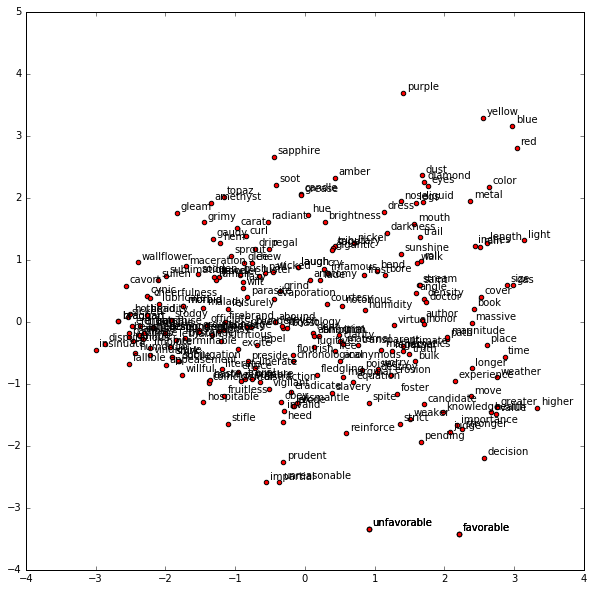

In [261]:
display_pca_scatterplot(model,words)